<a href="https://colab.research.google.com/github/SmitaM91/Netflix-data-Analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from textblob import TextBlob

# **Upload Netflix Dataset**

In [13]:
netflix=pd.read_csv('netflix_titles.csv') #Read csv file and load into Pandas data frame
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Initial Data Exploration

In [4]:
netflix.columns          #Check number of columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
netflix.info()           #Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
netflix[netflix.duplicated()]  #Check if we have any duplicates in the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [18]:
netflix.shape   # Check number of rows & columns

(8807, 12)

In [22]:
netflix.drop_duplicates(inplace=True)
netflix.shape   # Check if duplicates were removed. The drop_duplicates() function removes any duplicate rows from the dataset. The inplace=True argument modifies the DataFrame directly without creating a copy.

(8807, 12)

In [25]:
netflix.isnull().sum()  # check the missing (null) values in each column of the dataset

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [32]:
netflix['director'].nunique() #No. of directors listed in dataset

4528

In [36]:
netflix['type'].unique() #2 types in datasets

array(['Movie', 'TV Show'], dtype=object)

In [37]:
netflix['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


# Data Cleaning and Preprocessing

**Top 10 Country w.r.t Movie & TV**

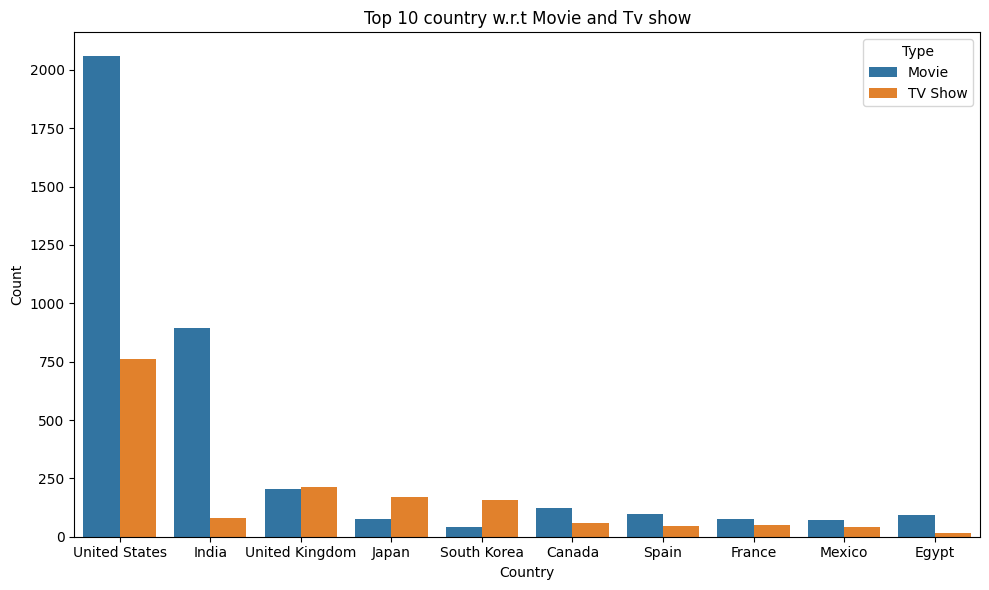

In [50]:
top_countries = netflix['country'].value_counts().head(10).index # Top 10 country w.r.t type
filtered_netflix= netflix[netflix['country'].isin(top_countries)] #filter dataset to include only those countries
plt.figure(figsize=(10,6))
sns.countplot(data=filtered_netflix,x='country',hue='type',order=top_countries)
plt.title("Top 10 country w.r.t Movie and Tv show")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.legend(title="Type")
plt.tight_layout()
plt.show()

**Yearwise Contet Addition**

In [60]:
netflix['Date']=pd.to_datetime(netflix['release_year'], format = '%Y')  # This line will converts the values to proper datetime format. System will auto detect the date format even if it's consitent
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Date'],
      dtype='object')

In [61]:
netflix['Date'].dt.year.value_counts()

,count
Date,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


This code analyzes the trend of content releases over the years. It first extracts the year from the 'Date' column using dt.year and then counts the number of content items released each year. The resulting trend is plotted, showing how Netflix's content production has evolved over time. The plot highlights peaks or drops in content releases, which could indicate significant events or shifts in strategy.

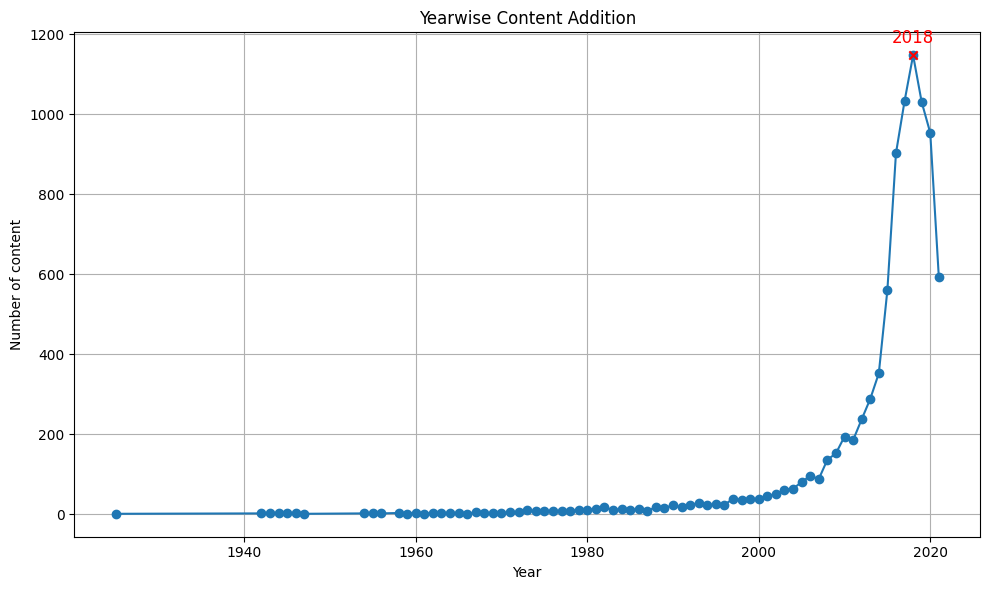

In [85]:
from pickle import TRUE

Yearwise_trend = netflix['Date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(Yearwise_trend.index,Yearwise_trend.values,marker="o")
plt.title("Yearwise Content Addition")
plt.xlabel("Year")
plt.ylabel("Number of content")
plt.grid(TRUE)


#Highlight the pick value

Peak_Year = Yearwise_trend.idxmax()
Peak_Value = Yearwise_trend.max()

plt.scatter(Peak_Year,Peak_Value,color="red",marker="x", zorder=5)
plt.text(Peak_Year,Peak_Value+30,f'{Peak_Year}',color="red",fontsize=12,ha="center")
plt.tight_layout()
plt.show()